# Placement Prediction Dataset

Este dataset se centra en la predicción de la empleabilidad de estudiantes en función de su desempeño académico, experiencia práctica y habilidades blandas. Contiene información sobre calificaciones, participación en pasantías, proyectos, certificaciones y actividades extracurriculares, así como puntajes en pruebas de aptitud y entrenamientos específicos para la colocación laboral. Su objetivo es analizar qué factores influyen en la posibilidad de que un estudiante consiga un empleo tras finalizar sus estudios.

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import *
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
np.random.seed(21)

En primer lugar vamos a cargar los archivos, este codigo permitira que descarguemos nuestro dataset desde la pagina de kaggle en donde se encuentra alojado

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"danielyaruro20","key":"5947ea14384e6ddef12feb6c4be520d7"}'}

In [3]:
import os
import zipfile

# Mover kaggle.json a la ubicación correcta
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json  # Asegurar permisos correctos

In [4]:
!kaggle datasets download -d ruchikakumbhar/placement-prediction-dataset
with zipfile.ZipFile("placement-prediction-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("placement_data")

Dataset URL: https://www.kaggle.com/datasets/ruchikakumbhar/placement-prediction-dataset
License(s): CC0-1.0
  0% 0.00/99.7k [00:00<?, ?B/s]
100% 99.7k/99.7k [00:00<00:00, 296MB/s]


## Carga y exploracion del dataset

De aqui podemos ver como son los tipos de datos que tendremos en nuestro dataset, tenemos desde booleanos, enteros, y algunos valores continuos

Vamos a ajustar el indice de nuestro dataset, de modo que el StudentID sea nuestro indice

In [5]:
import pandas as pd

df = pd.read_csv("/content/placement_data/placementdata.csv", index_col="StudentID")
df.head()

CGPA  Internships  Projects  Workshops/Certifications  \
StudentID                                                          
1           7.5            1         1                         1   
2           8.9            0         3                         2   
3           7.3            1         2                         2   
4           7.5            1         1                         2   
5           8.3            1         2                         2   

           AptitudeTestScore  SoftSkillsRating ExtracurricularActivities  \
StudentID                                                                  
1                         65               4.4                        No   
2                         90               4.0                       Yes   
3                         82               4.8                       Yes   
4                         85               4.4                       Yes   
5                         86               4.5                       Yes   

          PlacementTraining  SSC_Marks  HSC_Marks PlacementStatus  
StudentID                                                          
1                        No         61         79       NotPlaced  
2                       Yes         78         82          Placed  
3                        No         79         80       NotPlaced  
4                       Yes         81         80          Placed  
5                       Yes         74         88          Placed

De aqui podremos ver alguna informacion de nuestro dataset como son las columnas y ver que tantos valores nulos tiene, para este caso tendremos 10000 datos y todos los datos estan completos por lo que no tenemos valores nulos

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CGPA                       10000 non-null  float64
 1   Internships                10000 non-null  int64  
 2   Projects                   10000 non-null  int64  
 3   Workshops/Certifications   10000 non-null  int64  
 4   AptitudeTestScore          10000 non-null  int64  
 5   SoftSkillsRating           10000 non-null  float64
 6   ExtracurricularActivities  10000 non-null  object 
 7   PlacementTraining          10000 non-null  object 
 8   SSC_Marks                  10000 non-null  int64  
 9   HSC_Marks                  10000 non-null  int64  
 10  PlacementStatus            10000 non-null  object 
dtypes: float64(2), int64(6), object(3)
memory usage: 937.5+ KB


Podemos ver aqui algunas estadisticas de nuestro dataset para las variables numericas, para poder ubicar los datos que tenenmos y tener una idea clara de los valores posibles que pueden haber en cada columna

In [7]:
df.describe()

CGPA   Internships      Projects  Workshops/Certifications  \
count  10000.000000  10000.000000  10000.000000              10000.000000   
mean       7.698010      1.049200      2.026600                  1.013200   
std        0.640131      0.665901      0.867968                  0.904272   
min        6.500000      0.000000      0.000000                  0.000000   
25%        7.400000      1.000000      1.000000                  0.000000   
50%        7.700000      1.000000      2.000000                  1.000000   
75%        8.200000      1.000000      3.000000                  2.000000   
max        9.100000      2.000000      3.000000                  3.000000   

       AptitudeTestScore  SoftSkillsRating     SSC_Marks     HSC_Marks  
count       10000.000000      10000.000000  10000.000000  10000.000000  
mean           79.449900          4.323960     69.159400     74.501500  
std             8.159997          0.411622     10.430459      8.919527  
min            60.000000          3.000000     55.000000     57.000000  
25%            73.000000          4.000000     59.000000     67.000000  
50%            80.000000          4.400000     70.000000     73.000000  
75%            87.000000          4.700000     78.000000     83.000000  
max            90.000000          4.800000     90.000000     88.000000

Aqui podremos ver un poco de la descripcion de lo que son los valores que estan como cadenas o que no son numericos para poder observar como estan distribuidos esos datos en nuestro dataset

In [8]:
df.describe(include="object")

ExtracurricularActivities PlacementTraining PlacementStatus
count                      10000             10000           10000
unique                         2                 2               2
top                          Yes               Yes       NotPlaced
freq                        5854              7318            5803

Como podemos observar los valores que tenemos como cadenas de datos no son mas que valores booleanos pero en formato String, por ende lo que haremos sera esos datos parsearlos a formato boolean para un mejor manejo de estos datos a futuro

Usaremos 1 para los valores "Yes"

Usaremos 0 para los valores "No"

In [9]:
df_original = df.copy()

In [10]:
df["ExtracurricularActivities"] = df["ExtracurricularActivities"].apply(lambda x: 1 if x == "Yes" else 0)
df["PlacementTraining"] = df["PlacementTraining"].apply(lambda x: 1 if x == "Yes" else 0)
df["PlacementStatus"] = df["PlacementStatus"].apply(lambda x: 1 if x == "Placed" else 0)

Vemos ahora si las estadisticas de todas las 11 columnas de nuestro dataset

In [ ]:
df.describe()

CGPA   Internships      Projects  Workshops/Certifications  \
count  10000.000000  10000.000000  10000.000000              10000.000000   
mean       7.698010      1.049200      2.026600                  1.013200   
std        0.640131      0.665901      0.867968                  0.904272   
min        6.500000      0.000000      0.000000                  0.000000   
25%        7.400000      1.000000      1.000000                  0.000000   
50%        7.700000      1.000000      2.000000                  1.000000   
75%        8.200000      1.000000      3.000000                  2.000000   
max        9.100000      2.000000      3.000000                  3.000000   

       AptitudeTestScore  SoftSkillsRating  ExtracurricularActivities  \
count       10000.000000      10000.000000               10000.000000   
mean           79.449900          4.323960                   0.585400   
std             8.159997          0.411622                   0.492677   
min            60.000000          3.000000                   0.000000   
25%            73.000000          4.000000                   0.000000   
50%            80.000000          4.400000                   1.000000   
75%            87.000000          4.700000                   1.000000   
max            90.000000          4.800000                   1.000000   

       PlacementTraining     SSC_Marks     HSC_Marks  PlacementStatus  
count       10000.000000  10000.000000  10000.000000     10000.000000  
mean            0.731800     69.159400     74.501500         0.419700  
std             0.443044     10.430459      8.919527         0.493534  
min             0.000000     55.000000     57.000000         0.000000  
25%             0.000000     59.000000     67.000000         0.000000  
50%             1.000000     70.000000     73.000000         0.000000  
75%             1.000000     78.000000     83.000000         1.000000  
max             1.000000     90.000000     88.000000         1.000000

## Exploracion grafica del dataset

En primer lugar veremos como estan relacionadas nuestras variables y ver que concluciones podemos sacar de correlaciones en nuestro dataset, para ello nos ayudaremos de un pairplot() y tambien de una matriz de correlacion

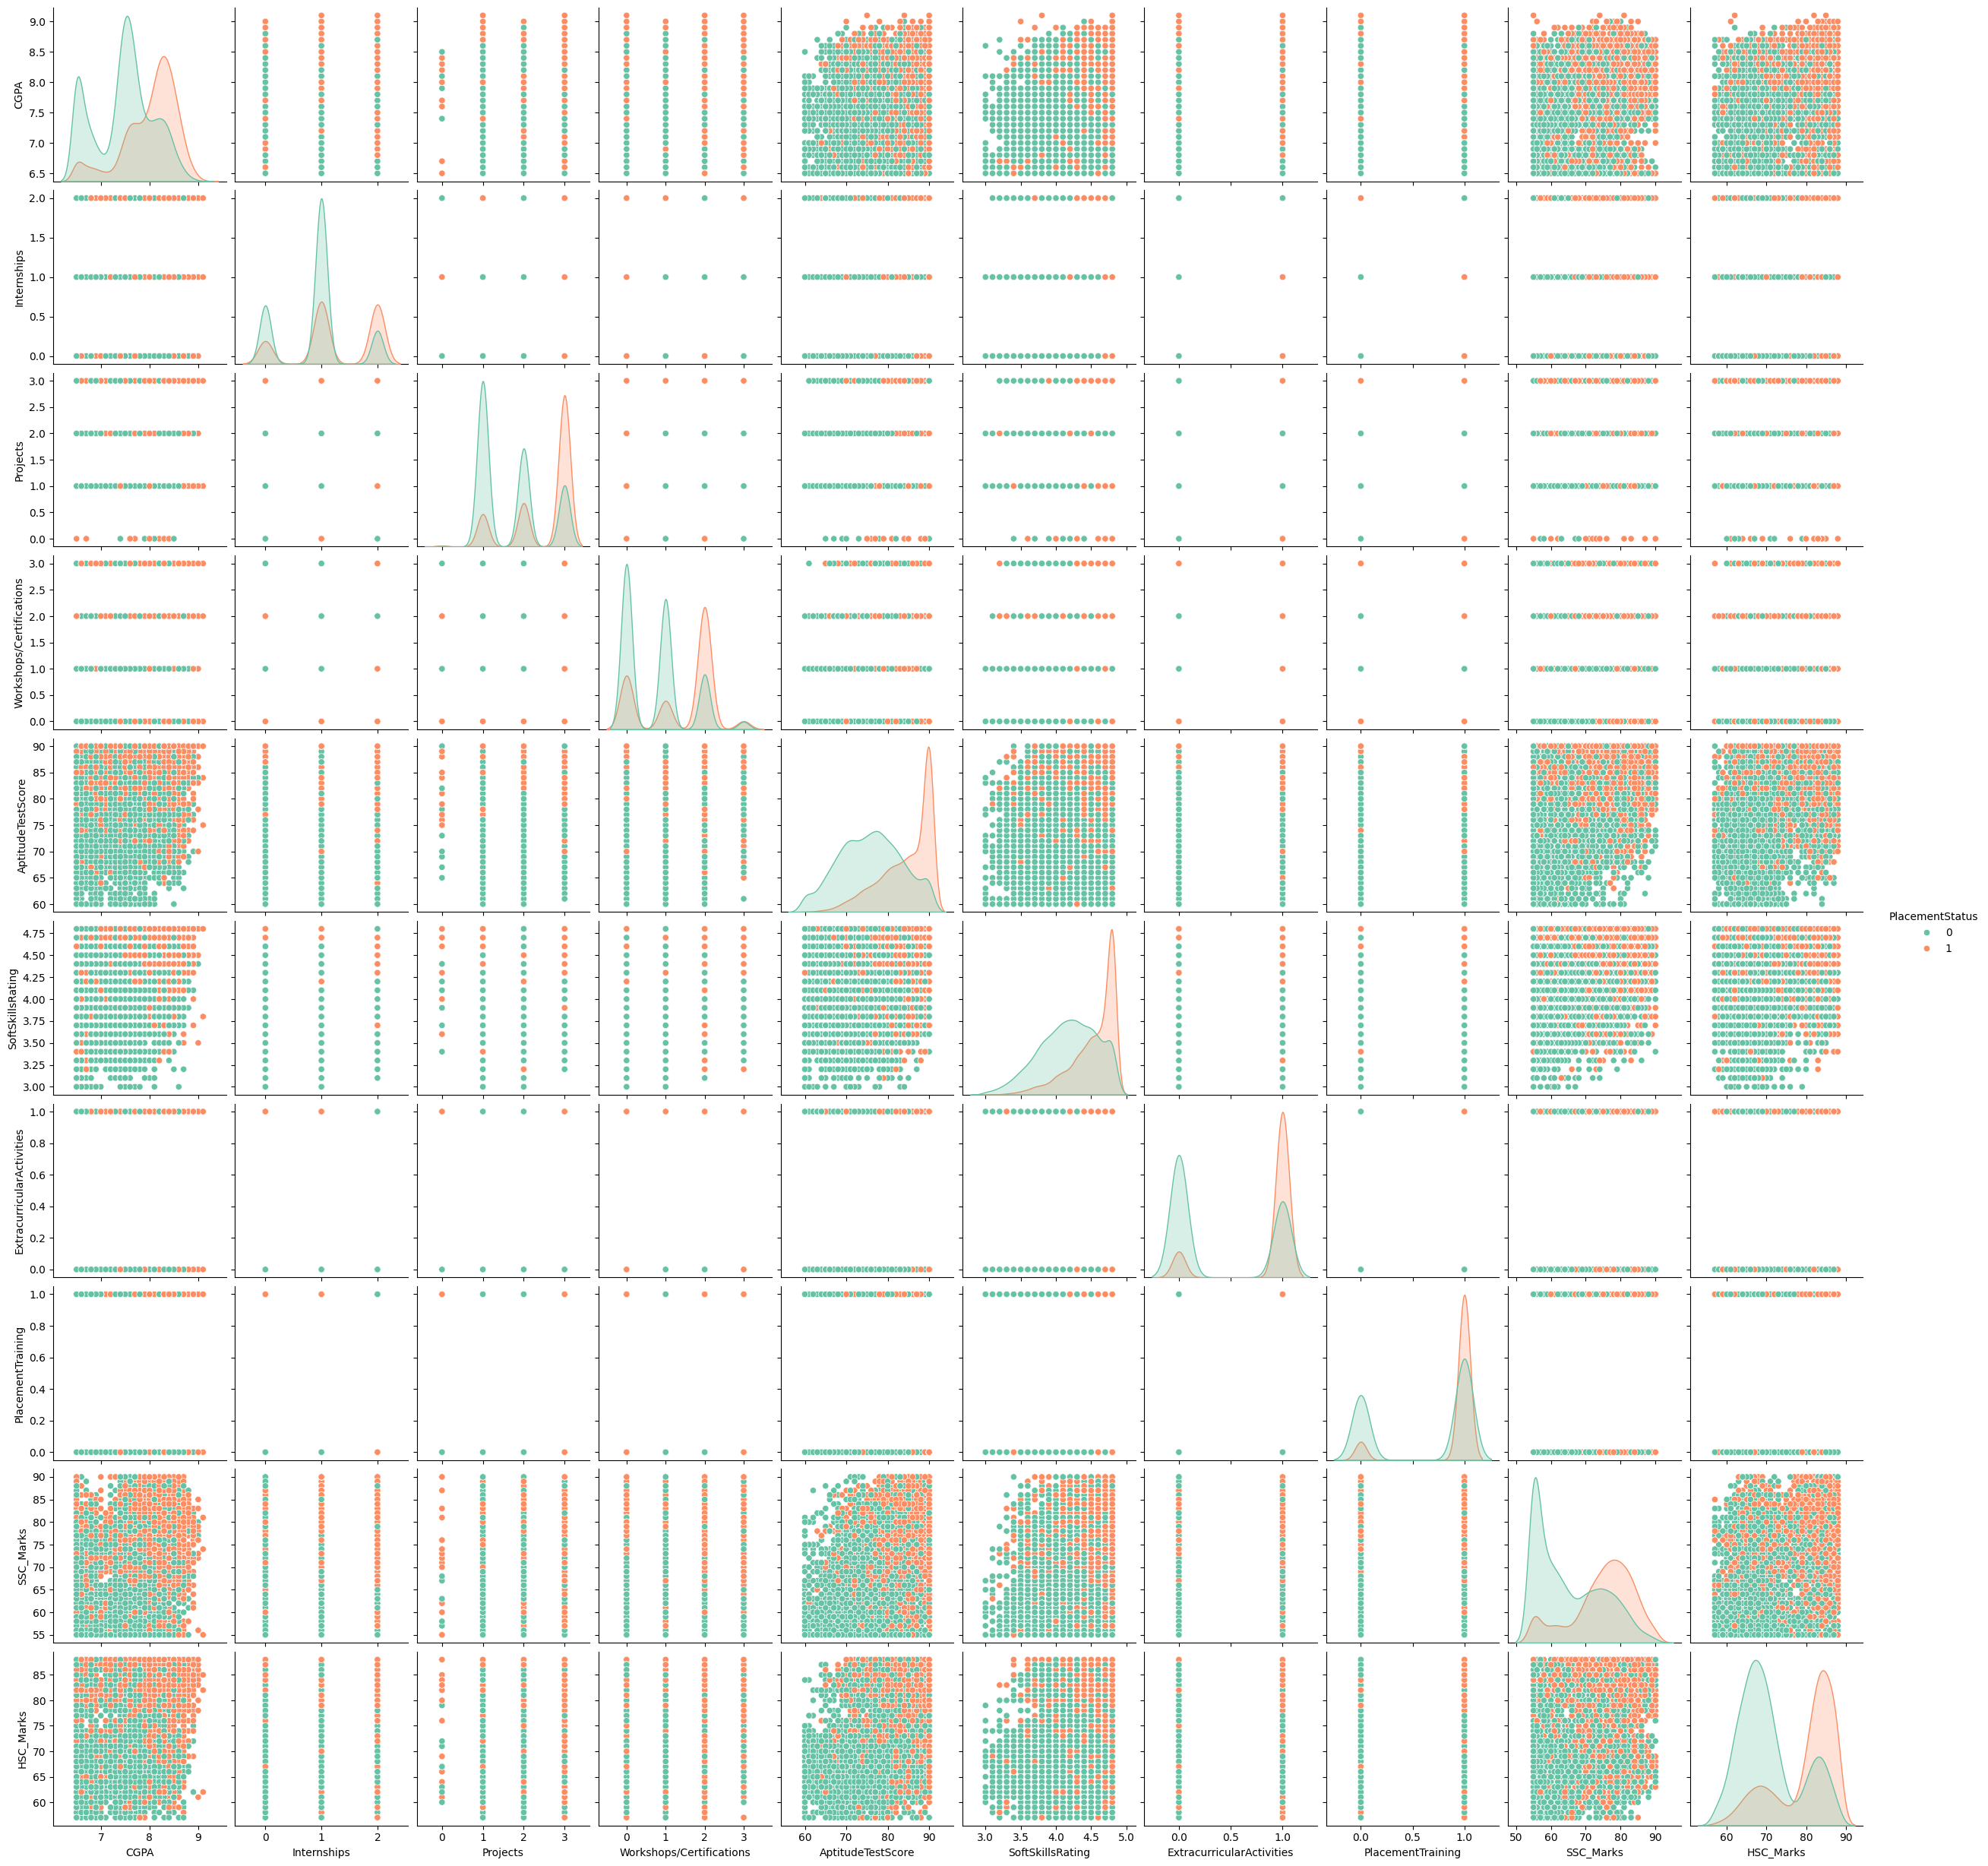

In [ ]:
#Pairplot entre todos nuestros datos para ver las respectivas correlaciones
sns.pairplot(df, hue="PlacementStatus", palette="Set2", diag_kind="kde")

A simpe vista de la grafica podemos ver que no se observa facilmente alguna correlacion entre las variables que tenemos, algo a destacar es que el color verde y naranja en las graficas corresponde a los valores booleanos sobre si un estudiante fue ubicado en un trabajo o no, sin embargo comprobemos la no existencia de correlacion entre las variables con una matriz de correlaciones

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CGPA                       10000 non-null  float64
 1   Internships                10000 non-null  int64  
 2   Projects                   10000 non-null  int64  
 3   Workshops/Certifications   10000 non-null  int64  
 4   AptitudeTestScore          10000 non-null  int64  
 5   SoftSkillsRating           10000 non-null  float64
 6   ExtracurricularActivities  10000 non-null  int64  
 7   PlacementTraining          10000 non-null  int64  
 8   SSC_Marks                  10000 non-null  int64  
 9   HSC_Marks                  10000 non-null  int64  
 10  PlacementStatus            10000 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 937.5 KB


<Axes: >

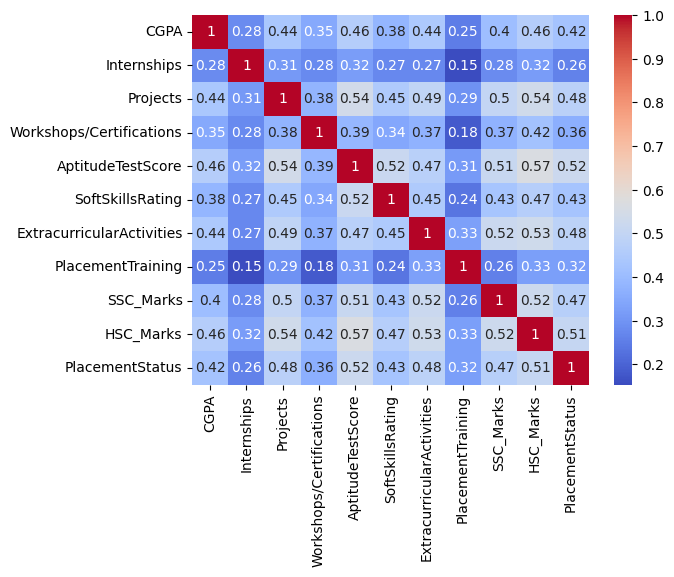

In [ ]:
corr_mat = df.corr()
sns.heatmap(corr_mat, annot=True, cmap="coolwarm") #Mapa de calor de las correlaciones entre los datos

Esta claro con nuestra grafica de calor de las correlaciones que no existe una fuerte correlacion entre alguna de nuestras variables

Vamos a explorar el conjunto de datos que tenemos, para poder ver la distribucion de los datos de todas las columnas

- **Columna CGPA**

Como vimos en el metodo describe es una columna que contiene valores continuos al parecer que van de 0 a 10, correspondientes al CGPA de cada estudiante del dataset, por ende el grafico que podria darnos mayor detalle es un histplot

<Axes: xlabel='CGPA', ylabel='Count'>

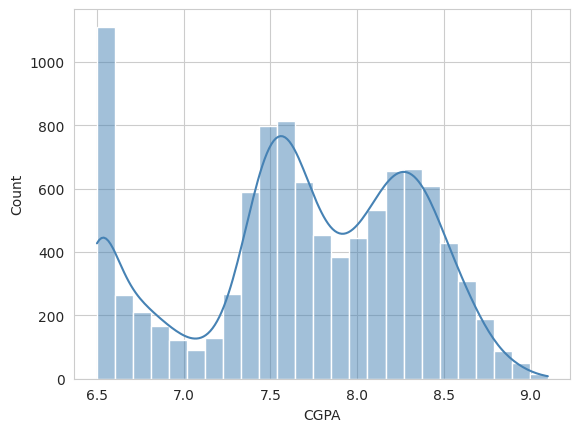

In [ ]:
sns.set_style("whitegrid")
sns.histplot(df, x="CGPA", bins=25, kde=True, color="steelblue")

En esta grafica podemos observar que los CGPA que tienen la mayoria de los estudiantes es de 6.5, tambien estan aproximademente entre 8.3-8.5, y tambien entre 7.3 y 7.7, no sigue una distribucion muy clara

- **Columna Internships**

Estos datos representan la cantidad de interships que han hecho los estudiantes, ahora el maximo valor que encontramos son hasta 2 interships de varios estudiantes, y el minimo valor es 0, es decir tendremos solo 3 categorias para este tipo de dato

<Axes: xlabel='Internships', ylabel='count'>

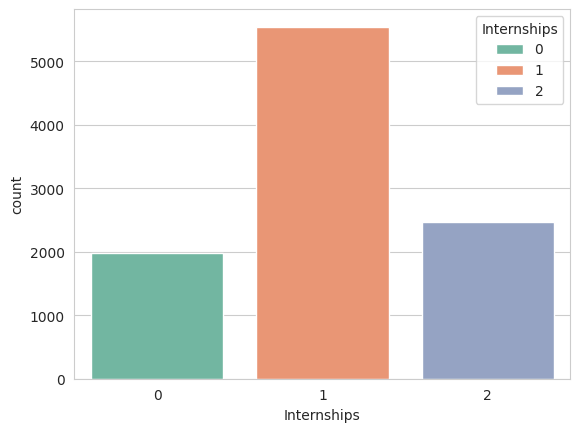

In [ ]:
sns.countplot(x="Internships", data=df, palette="Set2", hue="Internships")

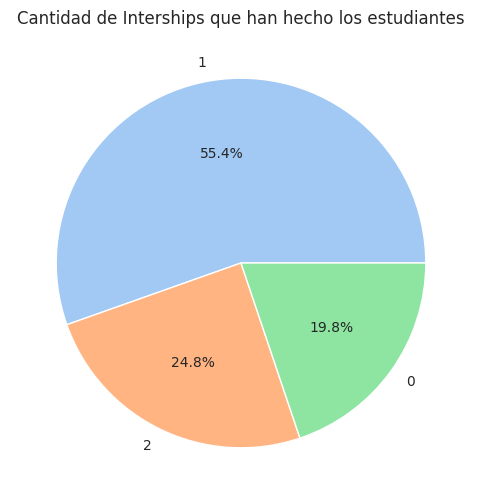

In [ ]:
plt.figure(figsize=(6, 6))
sns.set_style("whitegrid")
sns.set_palette("pastel")
plt.pie(df["Internships"].value_counts(), labels=df["Internships"].value_counts().index, autopct="%1.1f%%")
plt.title("Cantidad de Interships que han hecho los estudiantes")
plt.show()

El insight que logramos capturar de la grafica es que la mayoria de los estudiantes se postulan a un primer trabajo con al menos 1 internship realizado

- **Columna Projects**

Esta columna representa la cantidad de proyectos que han hecho los estudiantes antes de explorar su primer trabajo, como vemos se podria considerar una variable categorica por ende las graficas que mejor quedan serian countplot o un pieplot

In [ ]:
df["Projects"].value_counts()

Projects
3    3873
1    3547
2    2550
0      30
Name: count, dtype: int64

<Axes: xlabel='Projects', ylabel='count'>

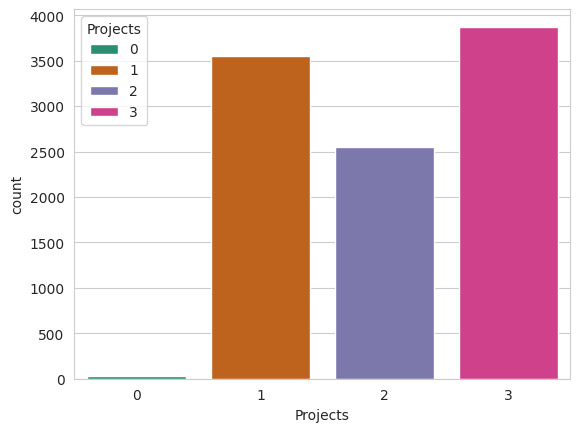

In [ ]:
sns.countplot(x="Projects", data=df, palette="Dark2", hue="Projects")

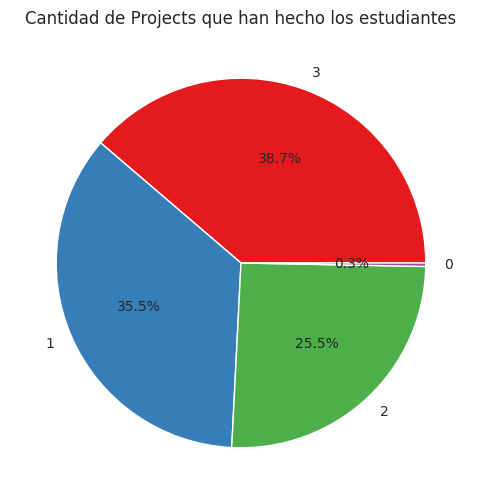

In [ ]:
plt.figure(figsize=(6, 6))
sns.set_style("whitegrid")
sns.set_palette("Set1")
plt.pie(df["Projects"].value_counts(), labels=df["Projects"].value_counts().index, autopct="%1.1f%%")
plt.title("Cantidad de Projects que han hecho los estudiantes")
plt.show()

Observando las graficos podemos notar que la mayoria de estudiantes cuenta con 3 proyectos o unos 2 proyectos a la hora de lanzarse a su primer trabajo

- **Columna Workshops/Certifications**

Esta columna corresponde a el numero de workshops/certificaciones de los estudiantes que se postularon para una colocacion

In [ ]:
df["Workshops/Certifications"].value_counts()

Workshops/Certifications
0    3739
2    3303
1    2674
3     284
Name: count, dtype: int64

Vamos a usar un grafico de barras apiladas teniendo en cuenta nuestra variable objetivo en este caso placement status donde cada color representara si ese estudiante fue asignado o no

In [ ]:
piv_table = df.groupby(["Workshops/Certifications", "PlacementStatus"]).size().unstack()

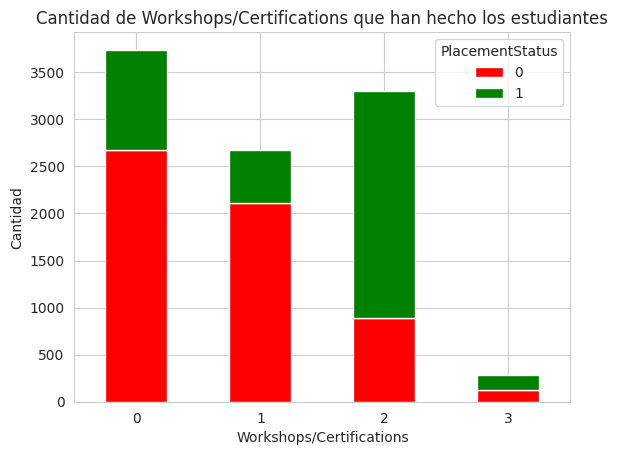

In [ ]:
piv_table.plot(kind="bar", stacked=True, color=["red", "green"]);
plt.title("Cantidad de Workshops/Certifications que han hecho los estudiantes");
plt.xlabel("Workshops/Certifications");
plt.ylabel("Cantidad");
plt.xticks(rotation=0);

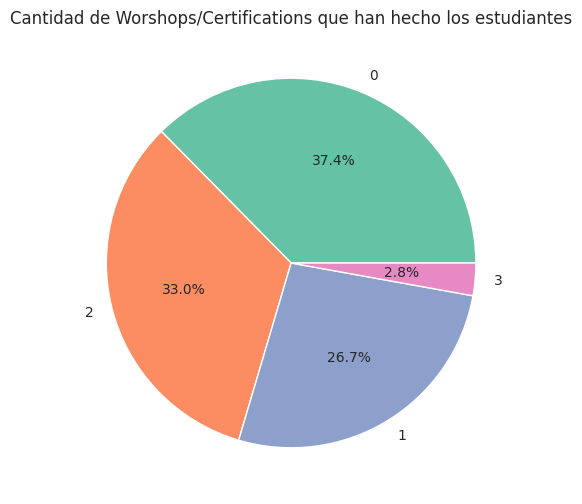

In [ ]:
plt.figure(figsize=(6, 6))
sns.set_style("whitegrid")
sns.set_palette("Set2")
plt.pie(df["Workshops/Certifications"].value_counts(), labels=df["Workshops/Certifications"].value_counts().index, autopct="%1.1f%%")
plt.title("Cantidad de Worshops/Certifications que han hecho los estudiantes")
plt.show()

Parece haber una ligera correlacion positiva entre la cantidad de workshops/certificaciones y la posibilidad de conseguir un trabajo. Los estudiantes con mas certificaciones tienen mas probabilidades de ser colocados en comparacion con los que no tienen ninguna. Es mas probable si tienen al menos dos workshops/certifications

- **Columna AptitudeTestScore**

Esta columna representa la calificacion que obtuvieron los estudiantes en el test de actitud que hace la empresa o organizacion para asignar a los estudiantes

Como pudimos ver esta columna tiene valores de calificacion del uno al 100, un histplot nos ayudara a ver como fue el resultado de los estudiantes en general

<Axes: xlabel='AptitudeTestScore', ylabel='Count'>

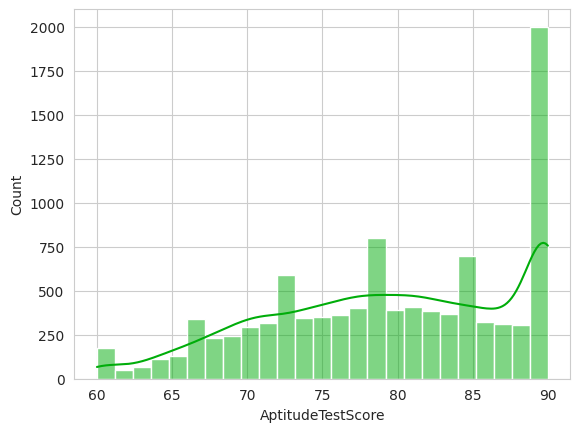

In [ ]:
sns.histplot(df, x="AptitudeTestScore", bins=25, kde=True, color="#00ad0a")

Los datos revelan que a la mayoria de los estudiantes les fue bastante bien en el test de aptitud mostrando la mayoria de calificaciones entre 90 y 100 aproximadamente

Veamos que tanto influye estos datos con la variable objetivo usando graficos como boxplot o violinplot

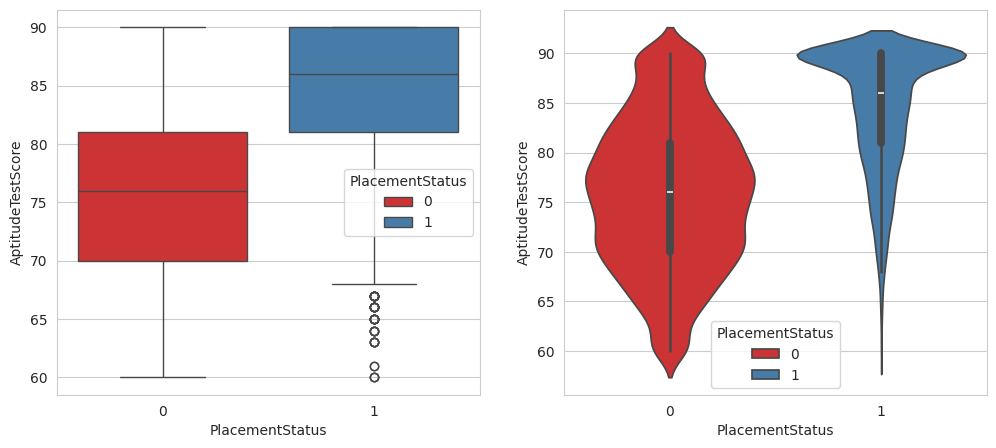

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.boxplot(x="PlacementStatus", y="AptitudeTestScore", data=df, ax=axes[0], hue="PlacementStatus", palette="Set1")
sns.violinplot(x="PlacementStatus", y="AptitudeTestScore", data=df, ax=axes[1], hue="PlacementStatus", palette="Set1")
plt.show()

Observando este par de graficas podemos resaltar que precisamente la mayoria de estudiantes que logran ser colocados obtienen un test de aptitud con una buena calificacion normalmente mayor que 80, sin embargo viendo los outliers podemos notar que no todos los que tienen una baja calificacion no logran ser colocados

- **Columna SoftSkillsRating**

Representa las calificaciones en habilidades blandas como la comunicación, una aptitud clave en la inserción laboral y otros ámbitos. Los valores son continuos, entre 3.00 y 4.80.

El histograma muestra su distribución con 19 intervalos, destacando una mayor concentración en las calificaciones más altas.

<Axes: xlabel='SoftSkillsRating', ylabel='Count'>

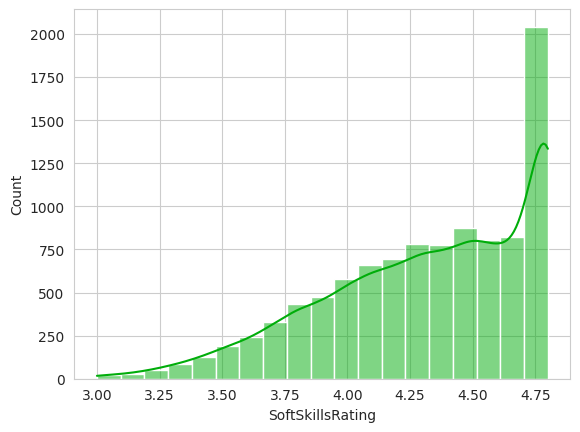

In [ ]:
sns.histplot(df, x="SoftSkillsRating", bins=19, kde=True, color="#00ad0a")

- **Columna ExtracurricularActivities**

Indica si el estudiante ha participado en actividades extracurriculares. Es un dato binario: Sí (1) o No (0).

El gráfico de torta muestra la proporción de estudiantes en cada categoría.

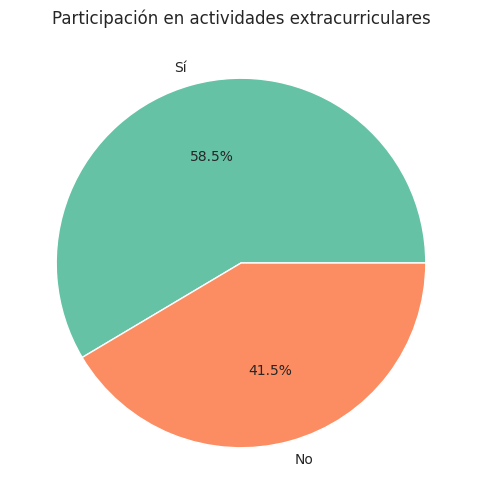

In [ ]:
plt.figure(figsize=(6, 6))
sns.set_style("whitegrid")
sns.set_palette("Set2")
counts = df["ExtracurricularActivities"].value_counts()
labels = ['Sí', 'No']
plt.pie(counts, labels=labels, autopct="%1.1f%%")
plt.title("Participación en actividades extracurriculares")
plt.show()

- **Columna PlacementTraining**

Este dato binario indica si los estudiantes han recibido capacitación para colocación laboral (1: Sí, 0: No). El gráfico de torta muestra la proporción de estudiantes que han participado en esta capacitación, la cual es proporcionada por la universidad para ayudarlos a destacar en el proceso de colocación laboral.

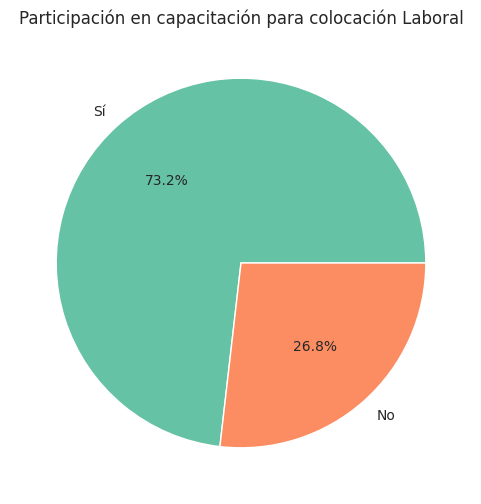

In [ ]:
plt.figure(figsize=(6, 6))
sns.set_style("whitegrid")
sns.set_palette("Set2")
counts = df["PlacementTraining"].value_counts()
labels = ['Sí', 'No']
plt.pie(counts, labels=labels, autopct="%1.1f%%")
plt.title("Participación en capacitación para colocación Laboral")
plt.show()

- **Columna SSC_Marks**

Dato númerico que representa las calificaciones obtenidas por el estudiante en la educación secundaria, reflejando el rendimiento académico del estudiante en esta etapa. Mediante un histograma observamos la distribución de dichas calificaciones, mostrando cómo se agrupan los valores, observando una concentracion en las calificaciones más bajas.


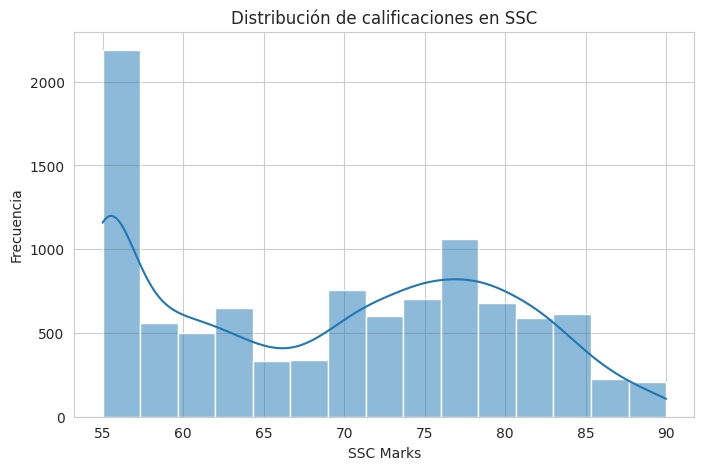

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['SSC_Marks'], bins=15, kde=True, color='#1f77b4')
plt.xlabel("SSC Marks")
plt.ylabel("Frecuencia")
plt.title("Distribución de calificaciones en SSC")
plt.show()

- **Columna HSC_Marks**

Dato númerico que epresenta las calificaciones obtenidas en la educación preuniversitaria, reflejando el rendimiento académico del estudiante en esta etapa.
Se hace uso de un histograma para poder observar la distribución de dichas calificaciones, lo que nos permite ver las concentraciones de datos o posibles picos.



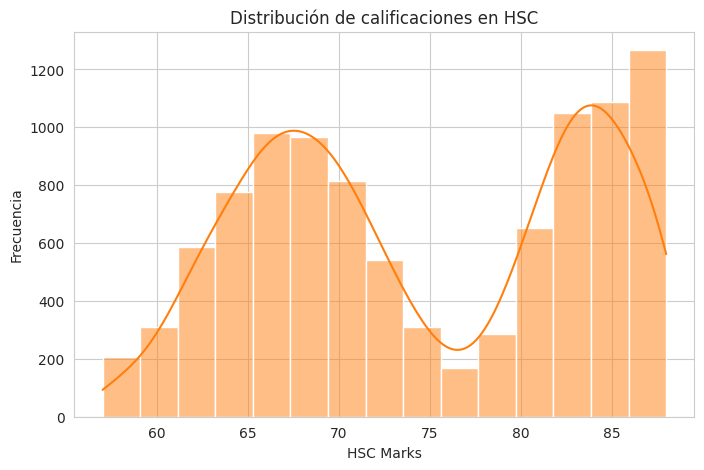

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['HSC_Marks'], bins=15, kde=True, color='#ff7f0e')
plt.xlabel("HSC Marks")
plt.ylabel("Frecuencia")
plt.title("Distribución de calificaciones en HSC")
plt.show()

- **Columna PlacementStatus**

Este dato binario con los valores Placed(1) y Not Placed(0) indica si el estudiante fue colocado en un empleo después de completar su educación. Se utiliza un gráfico de torta que nos permite visualizar de manera clara qué porcentaje de estudiantes ha conseguido empleo y cuál no.

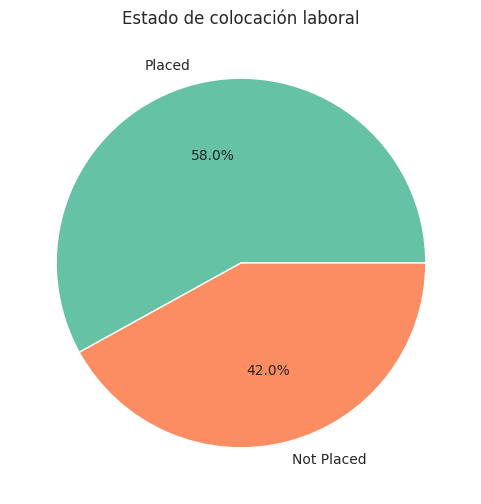

In [ ]:
plt.figure(figsize=(6,6))
sns.set_style("whitegrid")
sns.set_palette("Set2")
counts = df['PlacementStatus'].value_counts()
labels = ['Placed', 'Not Placed']
plt.pie(counts, labels=labels, autopct="%1.1f%%")
plt.title("Estado de colocación laboral")
plt.show()

# Machine Learning

## Classification Placement Status

Este campo (Placement Status) indica si un estudiante logró o no conseguir un trabajo después del proceso de reclutamiento universitario. Los valores típicos de esta columna son:

"Placed" → El estudiante fue contratado por una empresa.

"Not Placed" → El estudiante no consiguió un empleo durante el proceso de colocación.

Esta variable vamos a usarla como nuestra variable objetivo (ground truth)  para predecir si un estudiante tendrá éxito en colocarse laboralmente en función de sus características académicas, habilidades, experiencia, etc.

Haremos nuestro primer modelo basandonos en variables que estan mas correlacionadas con el ground truth las cuales son:

- CGPA
- Projects
- ExtracurricularActivities
- AptitudeTestScore
- SSC_Marks
- HSC_Marks

In [11]:
#Columnas mas relevantes para PlacementStatus
columnas_relevantes = ["CGPA", "Projects","ExtracurricularActivities", "AptitudeTestScore", "SSC_Marks", "HSC_Marks"]

In [12]:
X = df[columnas_relevantes]
y = df["PlacementStatus"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## ESTIMADORES

### Sin parametros

In [ ]:
#@title Desicion Tree
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7245


In [ ]:
#@title Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.772


In [ ]:
#@title Support Vector Machines (SVC Classificator)
svc = SVC(random_state=42)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.776


### Con parámetros

In [ ]:
#@title **code** learning curve para encontrar el N-Fold optimo
def show_curve(est):
  means, stds = [], []
  nfolds_range = range(2,30)
  for nfolds in nfolds_range:
      #print (nfolds,)
      s = cross_val_score(est, X, y, cv=KFold(nfolds, shuffle=True, random_state=39), scoring=make_scorer(mean_squared_error))
      means.append(np.mean(s))
      stds.append(np.std(s))

  means = np.r_[means]
  stds  = np.r_[stds]

  plt.plot(nfolds_range, means, label="mean", color="black")
  plt.fill_between(nfolds_range, means-stds, means+stds, color="blue", alpha=.5, label="std")
  plt.xlabel("n folds")
  plt.ylabel("performance")
  plt.legend()
  return means, stds

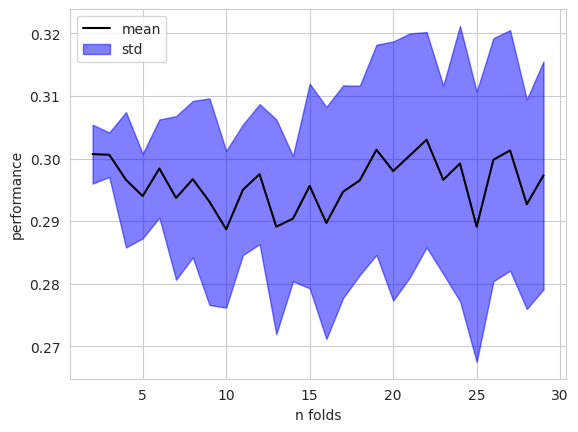

In [ ]:
#@title **code** Revisando el mejor N-Fold para nuestro Decision Tree
means, stds = show_curve(tree)

####Decision tree Classifier N-Folds optimo
Como podemos observar en la figura el N-Folds optimo para nuestro decision tree es de **10**

Desviacion estandar correspondiente a ese n KFolds

In [ ]:
stds[means.argmin()]

np.float64(0.012522379965485792)

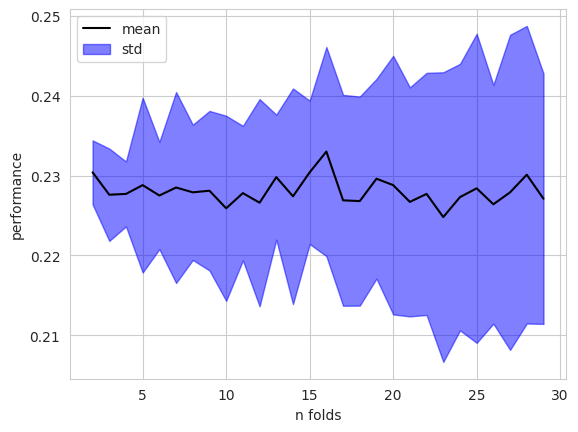

In [ ]:
#@title **code** Revisando el mejor N-Fold para nuestro Random Forest
means,stds = show_curve(rf)

#### Random Forest Classifier N-Folds optimo

Como podemos observar en la figura, si bien el que tiene un mejor numero de K-Folds en promedio parece ser **23** KFolds este tiene una desviacion estandar muy alta, por lo que el mas optimo seria unos **10** KFolds observando entre N-Folds y desviacion estandar

Desviacion estandar correspondiente a **10** KFolds

In [ ]:
stds[8]

np.float64(0.011579723658188051)

In [ ]:
#@title **code** learning curve para encontrar el mejor max_depth
def show_curve_max_depth(est):
  means, stds = [], []
  max_depth_range = range(1, 30)
  for max_depth in max_depth_range:
    est.max_depth = max_depth
    s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True, random_state=39), scoring=make_scorer(mean_squared_error))
    means.append(np.mean(s))
    stds.append(np.std(s))

  means = np.r_[means]
  stds  = np.r_[stds]

  plt.plot(max_depth_range, means, label="mean", color="black")
  plt.fill_between(max_depth_range, means-stds, means+stds, color="blue", alpha=.5, label="std")
  plt.xlabel("max_depth")
  plt.ylabel("performance")
  plt.legend()
  return means, stds

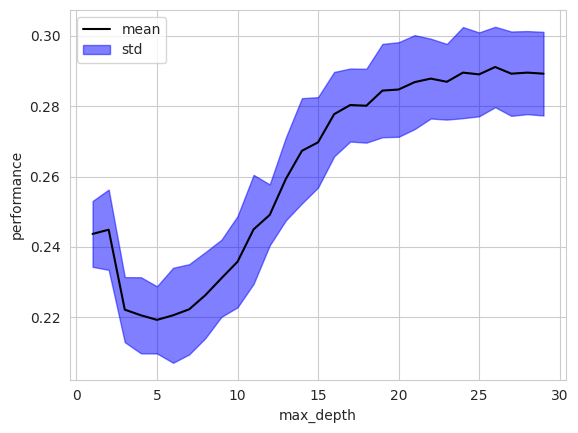

In [ ]:
#@title **code** Revisando el mejor max_depth para nuestro Decision Tree
means, stds = show_curve_max_depth(tree)

####Decision tree Classifier max_depth optimo
Como podemos observar en la figura el max_depth optimo para nuestro decision tree es de **4**

Desviacion estandar correspondiente a ese max_depth

In [ ]:
stds[means.argmin()]

np.float64(0.009539916142189095)

In [ ]:
#@title **code** learning curve para encontrar el mejor n_estimators
def show_curve_n_estimators(est):
  means, stds = [], []
  n_estimators_range = range(10, 210, 10)
  for n_estimators in n_estimators_range:
    est.set_params(n_estimators=n_estimators)
    s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True, random_state=39), scoring=make_scorer(mean_squared_error))
    means.append(np.mean(s))
    stds.append(np.std(s))

  means = np.r_[means]
  stds  = np.r_[stds]

  plt.plot(n_estimators_range, means, label="mean", color="black")
  plt.fill_between(n_estimators_range, means-stds, means+stds, color="blue", alpha=.5, label="std")
  plt.xlabel("n_estimators")
  plt.ylabel("performance")
  plt.legend()
  return means, stds

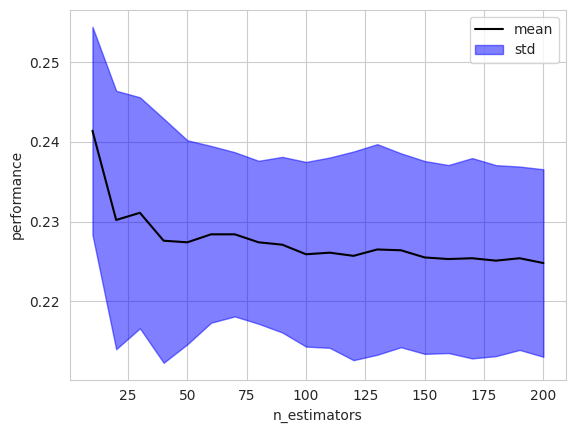

In [ ]:
#@title **code** Revisando el mejor n_estimators para nuestro Random Forest
means,stds = show_curve_n_estimators(rf)

#### Random Forest Classifier n_estimators optimo

Como podemos observar en la figura el n_estimators optimo para nuestro random forest es de **170**

Desviacion estandar correspondiente a **10** n_estimators

In [ ]:
stds[means.argmin()]

np.float64(0.011762652762026088)

In [ ]:
#@title **code** learning curve para encontrar el mejor kernel para SVM
def show_bar_kernel_svm(est):
  means, stds = [], []
  kernels = ['linear', 'poly', 'rbf']
  for kernel in kernels:
    est.set_params(kernel=kernel)
    s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True, random_state=39), scoring=make_scorer(mean_squared_error))
    means.append(np.mean(s))
    stds.append(np.std(s))

  means = np.array(means)
  stds = np.array(stds)

  x = np.arange(len(kernels))
  cmap = plt.get_cmap('Set2')
  colors = cmap(np.linspace(0, 1, len(kernels)))
  bars = plt.bar(kernels, means, yerr=stds, capsize=10,edgecolor='black', width=0.6, color=colors)

  plt.xticks(x, kernels)
  plt.xlabel("kernel")
  plt.ylabel("performance")
  plt.tight_layout()
  plt.show()

  return means, stds

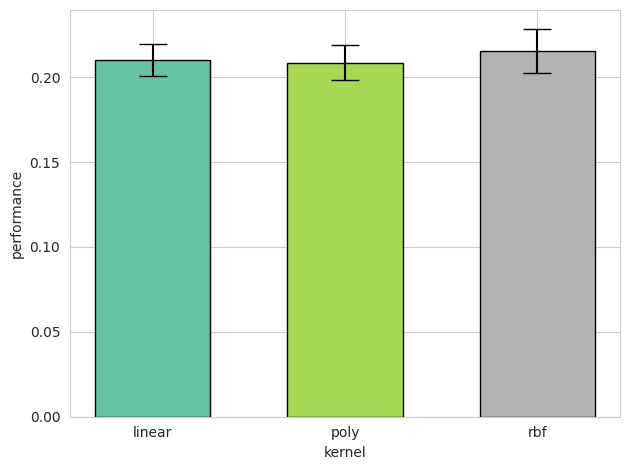

In [ ]:
means, stds = show_bar_kernel_svm(svc)

## Hyperparameters Tunning

### Decision Tree (Max_depth)

In [ ]:
best_tree = GridSearchCV(tree,
                         param_grid={"max_depth": range(1,30)},
                      scoring='accuracy',
                         cv=KFold(n_splits=10, shuffle=True, random_state=39)) #Escogemos el mejor numero de split con el KFold que anteriormente vimos
best_tree.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=39, shuffle=True),
             estimator=DecisionTreeClassifier(max_depth=29, random_state=42),
             param_grid={'max_depth': range(1, 30)}, scoring='accuracy')

In [ ]:
best_tree.best_params_

{'max_depth': 4}

### Random Forest

In [ ]:
best_forest = GridSearchCV(rf,
                         param_grid={"n_estimators": [1] + list(range(10,200,10))},
                      scoring='accuracy',
                         cv=KFold(n_splits=10, shuffle=True, random_state=39))
best_forest.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=39, shuffle=True),
             estimator=RandomForestClassifier(n_estimators=200,
                                              random_state=42),
             param_grid={'n_estimators': [1, 10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100, 110, 120, 130, 140, 150, 160,
                                          170, 180, 190]},
             scoring='accuracy')

In [ ]:
best_forest.best_params_

{'n_estimators': 170}

### Support Vector Machines **(Kernel)**

In [ ]:
best_svm = GridSearchCV(svc,
                         param_grid={"kernel": ["linear", "poly", "rbf"]},
                      scoring='accuracy',
                         cv=KFold(n_splits=10, shuffle=True, random_state=3))
best_svm.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=3, shuffle=True),
             estimator=SVC(random_state=42),
             param_grid={'kernel': ['linear', 'poly', 'rbf']},
             scoring='accuracy')

In [ ]:
best_svm.best_params_

{'kernel': 'poly'}

## Best Models trained with the best hyperparametrs
#### Decision Tree Classifier

In [ ]:
best_decision_tree = DecisionTreeClassifier(max_depth=4, random_state=42)
best_decision_tree.fit(X_train, y_train)
predictions_tree = best_decision_tree.predict(X_test)
accuracy_tree = accuracy_score(y_test, predictions_tree)
print("Accuracy Decision Tree:", accuracy_tree)

Accuracy Decision Tree: 0.7805


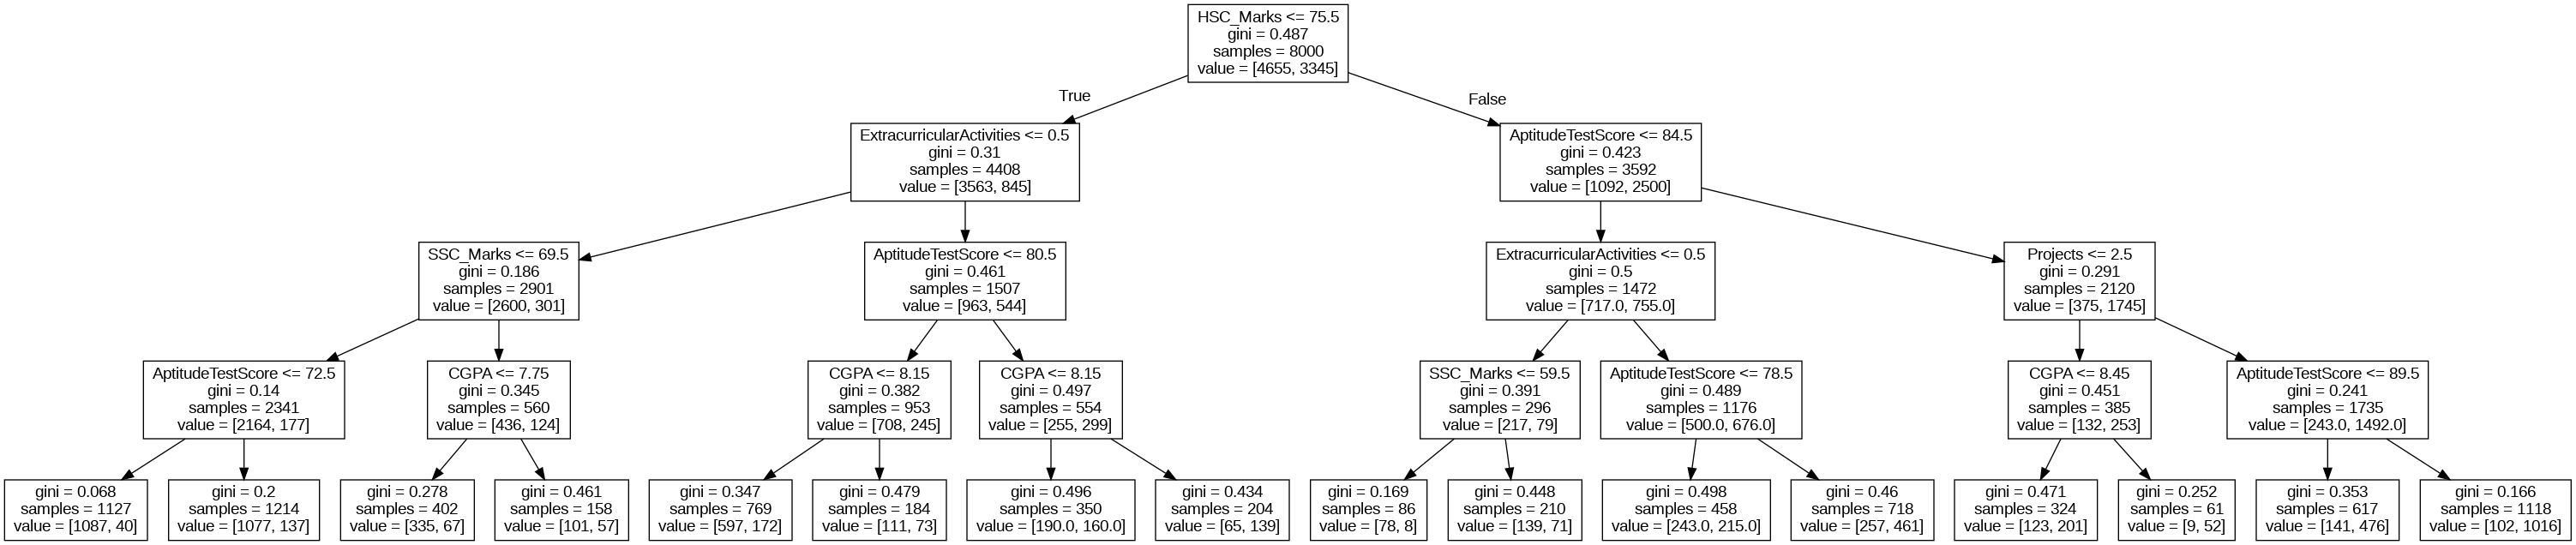

In [ ]:
from sklearn.tree import export_graphviz
from IPython.display import Image

export_graphviz(best_decision_tree, out_file='tree_c.dot', feature_names=X_train.columns)
!dot -Tpng tree_c.dot > tree_c.png
Image(filename='tree_c.png')

#### Random Forest Classifier

In [ ]:
best_rf = RandomForestClassifier(n_estimators=170, random_state=42)
best_rf.fit(X_train, y_train)
predictions_rf = best_rf.predict(X_test)
accuracy_rf = accuracy
print("Accuracy Random Forest:", accuracy_rf)

Accuracy Random Forest: 0.776


#### Support Vector Machines

In [ ]:
best_svc = SVC(kernel='poly', random_state=42)
best_svc.fit(X_train, y_train)
predictions_svc = best_svc.predict(X_test)
accuracy_svc = accuracy_score(y_test, predictions_svc)
print("Accuracy Support Vector Machine: ", accuracy_svc)

Accuracy Support Vector Machine:  0.781


## Deep Learning

Estaremos aplicando un modelo de redes neuronales artificiales para clasificacion de la variable placement a partir de las columnas relevante previamente seleccionadas

Realizamos un chekeo de nuestra variable X

In [13]:
X.head()

CGPA  Projects  ExtracurricularActivities  AptitudeTestScore  \
StudentID                                                                 
1           7.5         1                          0                 65   
2           8.9         3                          1                 90   
3           7.3         2                          1                 82   
4           7.5         1                          1                 85   
5           8.3         2                          1                 86   

           SSC_Marks  HSC_Marks  
StudentID                        
1                 61         79  
2                 78         82  
3                 79         80  
4                 81         80  
5                 74         88

Para que nuestro modelo funcione correctamente en la red neuronal debemos normalizar las columnas de nuestro dataset

In [16]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[:5]

array([[-0.30934266, -1.18282217, -1.18826064, -1.77091031, -0.78230576,
         0.50436813],
       [ 1.87781819,  1.12152649,  0.84156621,  1.29296956,  0.84761775,
         0.84072567],
       [-0.62179421, -0.03064784,  0.84156621,  0.312528  ,  0.94349561,
         0.61648731],
       [-0.30934266, -1.18282217,  0.84156621,  0.68019359,  1.13525131,
         0.61648731],
       [ 0.94046354, -0.03064784,  0.84156621,  0.80274878,  0.46410634,
         1.51344076]])

In [19]:
X_scaled.shape

(10000, 6)

Tambien usamos el mismo scaler para el X_test

In [25]:
X_test_scaled = scaler.transform(X_test)

Revisamos el groundTruth

In [18]:
y.head()

StudentID
1    0
2    1
3    0
4    1
5    1
Name: PlacementStatus, dtype: int64

Ya podemos proceder a crear nuestra red neuronal para realizar la clasificacion binaria de si un estudiante sera colocado en un trabajo o no

La estructura que vamos a crear sera la siguiente:



In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=X_scaled[0].shape),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(2, activation='sigmoid') #Clasificacion binaria
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy', ])

model.fit(X_scaled, y, epochs=100)

In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 6)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,952 (42.79 KB)

 Trainable params: 3,650 (14.26 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,302 (28.53 KB)

Evaluamos el modelo

In [28]:
test_loss, test_acc = model.evaluate(X_test_scaled, y_test)

print('Test accuracy:', test_acc)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8615 - loss: 0.3537
Test accuracy: 0.843999981880188


Obtuvimos un accuracy de 84% con nuestra red neuronal

## Principal Components Analysis PCA

Para nuestro analisis de componentes principales en donde buscaremos reducir la dimensionalidad de nuestro dataset, utilizaremos todas la columnas disponibles del mismo, y intentaremos primeramente reducir su dimensionalidad a 2 y 3 dimensiones y revisar si visualmente reduciendo la dimensionalidad es posible trazar un decision boundary

In [37]:
X = df.drop(columns=["PlacementStatus"])
y = df["PlacementStatus"]

In [38]:
X.head()

CGPA  Internships  Projects  Workshops/Certifications  \
StudentID                                                          
1           7.5            1         1                         1   
2           8.9            0         3                         2   
3           7.3            1         2                         2   
4           7.5            1         1                         2   
5           8.3            1         2                         2   

           AptitudeTestScore  SoftSkillsRating  ExtracurricularActivities  \
StudentID                                                                   
1                         65               4.4                          0   
2                         90               4.0                          1   
3                         82               4.8                          1   
4                         85               4.4                          1   
5                         86               4.5                          1   

           PlacementTraining  SSC_Marks  HSC_Marks  
StudentID                                           
1                          0         61         79  
2                          1         78         82  
3                          0         79         80  
4                          1         81         80  
5                          1         74         88

Para el PCA debemos normalizar nuestras columnas

In [42]:
X_scaled_numerical = scaler.fit_transform(X.drop(columns=["PlacementTraining", "ExtracurricularActivities"]))

df_X_scaled = pd.DataFrame(X_scaled_numerical, columns=X.drop(columns=["PlacementTraining", "ExtracurricularActivities"]).columns)

df_X_scaled["PlacementTraining"] = X["PlacementTraining"].values
df_X_scaled["ExtracurricularActivities"] = X["ExtracurricularActivities"].values

df_X_scaled.head()

CGPA  Internships  Projects  Workshops/Certifications  \
0 -0.309343    -0.073889 -1.182822                 -0.014598   
1  1.877818    -1.575689  1.121526                  1.091319   
2 -0.621794    -0.073889 -0.030648                  1.091319   
3 -0.309343    -0.073889 -1.182822                  1.091319   
4  0.940464    -0.073889 -0.030648                  1.091319   

   AptitudeTestScore  SoftSkillsRating  SSC_Marks  HSC_Marks  \
0          -1.770910          0.184742  -0.782306   0.504368   
1           1.292970         -0.787072   0.847618   0.840726   
2           0.312528          1.156555   0.943496   0.616487   
3           0.680194          0.184742   1.135251   0.616487   
4           0.802749          0.427695   0.464106   1.513441   

   PlacementTraining  ExtracurricularActivities  
0                  0                          0  
1                  1                          1  
2                  0                          1  
3                  1                          1  
4                  1                          1

Originalmente tenemos 10 columnas

In [43]:
df_X_scaled.shape

(10000, 10)

In [45]:
#@title PCA algorithm 2 components

pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_X_scaled)
X_pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
X_pca_df.head()

PC1       PC2
0 -1.443352  0.419516
1  1.947913 -1.804695
2  1.205685 -0.304044
3  0.840549 -0.138750
4  1.929610 -0.372504

La "energia" que conservamos con dos componentes es de 57%

In [48]:
pca.explained_variance_ratio_.sum()

np.float64(0.5760480693712656)

Y de los componentes individuales cada uno

In [49]:
pca.explained_variance_ratio_

array([0.48074011, 0.09530796])

Vamos a revisar la grafica en 2D de nuestros componentes principales

<Axes: xlabel='PC1', ylabel='PC2'>

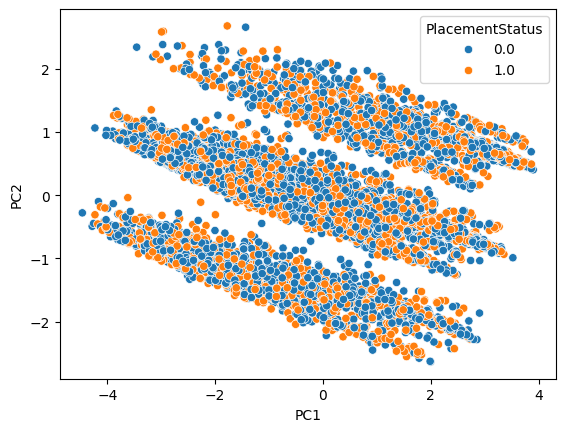

In [46]:
sns.scatterplot(data=X_pca_df, x="PC1", y="PC2", hue=y)

Visualmente sigue siendo dificil separarla con solo dos componentes

Veamos con 3 Dimensiones si podria visualizarse la separacion

In [50]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(df_X_scaled)
X_pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2", "PC3"])
X_pca_df.head()

PC1       PC2       PC3
0 -1.443352  0.419516  0.462327
1  1.947913 -1.804695  1.204749
2  1.205685 -0.304044  0.657292
3  0.840549 -0.138750  0.922499
4  1.929610 -0.372504  0.752477

La energia que conservamos con 3 componentes es de 66%

In [51]:
pca.explained_variance_ratio_.sum()

np.float64(0.6573649977888434)

Individualmente la energia de cada uno es

In [52]:
pca.explained_variance_ratio_

array([0.48074011, 0.09530796, 0.08131693])

**La grafica con 3 componentes**

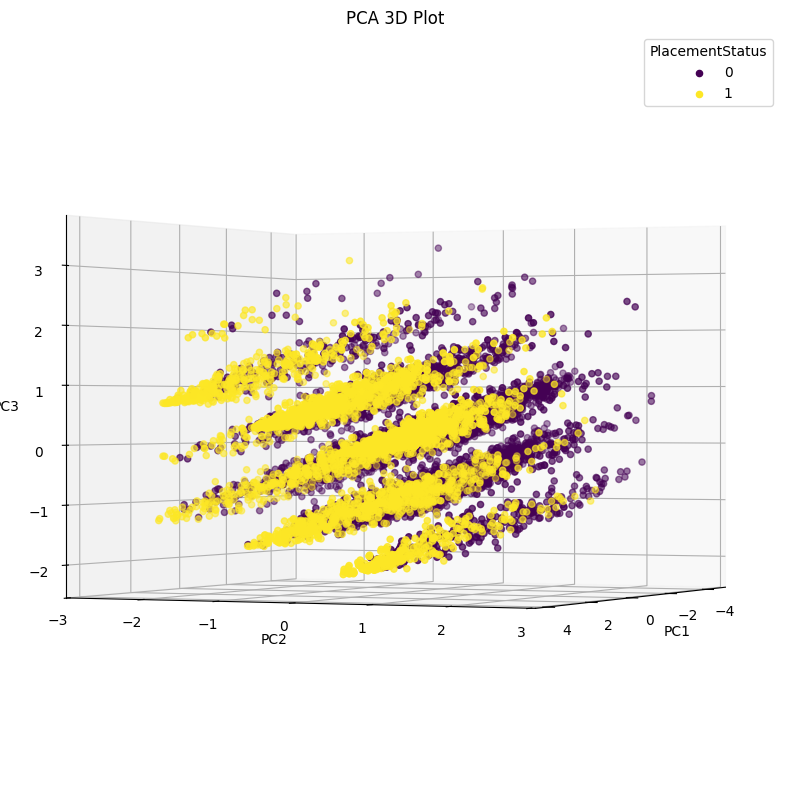

In [59]:
# Reset the index of y to match the default integer index of X_pca_df
y_aligned = y.reset_index(drop=True)

plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.view_init(elev=0, azim=25)
# Use the aligned y for unique labels and creating the mask
unique_labels = y_aligned.unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_labels)))
color_map = dict(zip(unique_labels, colors))

for label in unique_labels:
    # Create the mask using the aligned y and check against the current label
    mask = y_aligned == label
    ax.scatter(X_pca_df.loc[mask, "PC1"], X_pca_df.loc[mask, "PC2"], X_pca_df.loc[mask, "PC3"],
               c=[color_map[label]], label=label)

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("PCA 3D Plot")
ax.legend(title=y_aligned.name)
plt.show()

Si rotamos un poco la imagen

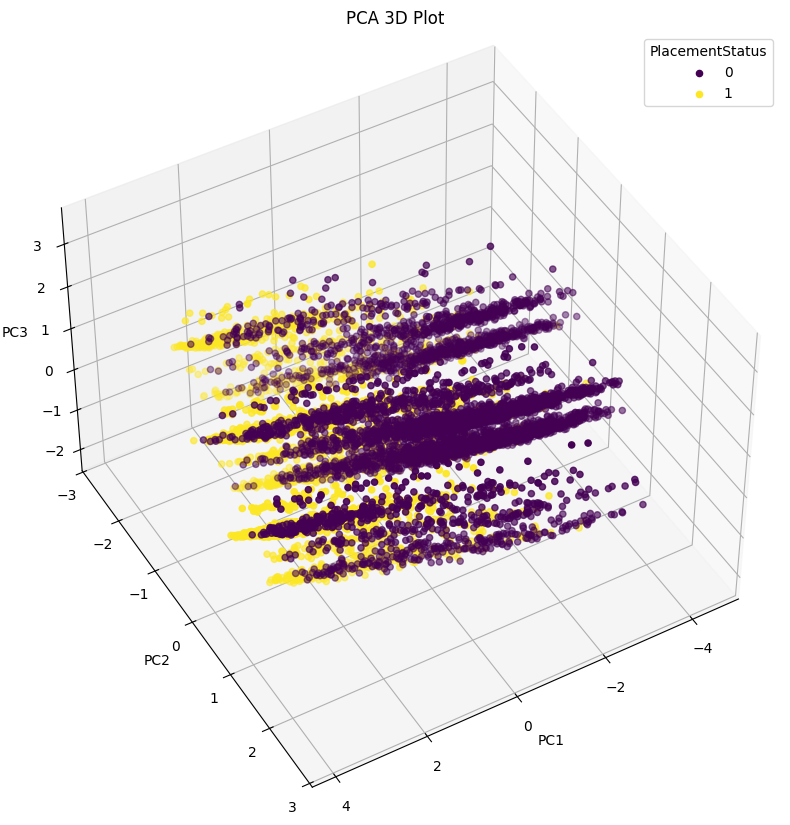

In [75]:
# Reset the index of y to match the default integer index of X_pca_df
y_aligned = y.reset_index(drop=True)

plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.view_init(elev=45, azim=60)
# Use the aligned y for unique labels and creating the mask
unique_labels = y_aligned.unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_labels)))
color_map = dict(zip(unique_labels, colors))

for label in unique_labels:
    # Create the mask using the aligned y and check against the current label
    mask = y_aligned == label
    ax.scatter(X_pca_df.loc[mask, "PC1"], X_pca_df.loc[mask, "PC2"], X_pca_df.loc[mask, "PC3"],
               c=[color_map[label]], label=label)

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("PCA 3D Plot")
ax.legend(title=y_aligned.name)
plt.show()

### Variance explained por numero de componentes

Veremos la grafica del porcentaje de varianza explicada por numero de componentes al reducir la dimensionalidad

In [76]:
variances = []
for i in range(1, 11):
    pca = PCA(n_components=i)
    pca.fit(df_X_scaled)
    variances.append(pca.explained_variance_ratio_.sum())

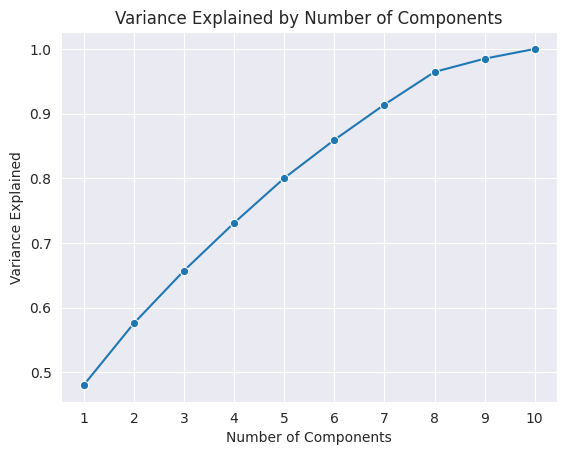

In [81]:
#Ponemos puntos en los enteros
sns.lineplot(x=range(1, 11), y=variances, marker='o')
plt.xticks(range(1, 11))
plt.grid(True)
plt.xlabel("Number of Components")
plt.ylabel("Variance Explained")
plt.title("Variance Explained by Number of Components")
plt.show()